# This jupyter notebook is prepared by Tyler Beach.

# 1. Load Data and perform basic EDA (4pts total)

### 1.1 import libraries: numpy, pandas, matplotlib.pyplot, seaborn, sklearn (1pt)

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import sklearn

### 1.2 Upload the dataset to your Google Drive, then using the following code, import the data to a pandas dataframe and show the count of rows and columns (0.5pt)

In [70]:
from google.colab import drive
drive.mount('/content/drive')
file_name = '/content/drive/My Drive/hr_data_.csv' #you may need to change this line depending on the location of your file in Google Drive
with open(file_name, 'r') as file:
    df = pd.read_csv(file);

print(str(df.shape[0]) + " rows, " + str(df.shape[1]) + " columns")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
8955 rows, 15 columns


### 1.3 Show the top 7 and bottom 7 rows (0.5pt)

In [71]:
print(df.iloc[0:7])
print("\n\n")
print(df.iloc[8948:8955])

   Unnamed: 0  enrollee_id      city  city_development_index gender  \
0           1        29725   city_40                   0.776   Male   
1           4          666  city_162                   0.767   Male   
2           7          402   city_46                   0.762   Male   
3           8        27107  city_103                   0.920   Male   
4          11        23853  city_103                   0.920   Male   
5          12        25619   city_61                   0.913   Male   
6          15         6588  city_114                   0.926   Male   

       relevent_experience enrolled_university education_level  \
0   No relevent experience       no_enrollment        Graduate   
1  Has relevent experience       no_enrollment         Masters   
2  Has relevent experience       no_enrollment        Graduate   
3  Has relevent experience       no_enrollment        Graduate   
4  Has relevent experience       no_enrollment        Graduate   
5  Has relevent experience       no

### 1.4 Show if any column has null values (0.5pt)

In [72]:
print("True if there is a null value, false if there is no null value\n")
print(df.isnull().any())

True if there is a null value, false if there is no null value

Unnamed: 0                False
enrollee_id               False
city                      False
city_development_index    False
gender                    False
relevent_experience       False
enrolled_university       False
education_level           False
major_discipline          False
experience                False
company_size              False
company_type              False
last_new_job              False
training_hours            False
target                    False
dtype: bool


### 1.5 Show/Plot the count of unique target labels and discuss its imbalances and possible issues in using it for classification. (1.5pt)

Unnamed: 0                8955
enrollee_id               8955
city                       116
city_development_index      91
gender                       3
relevent_experience          2
enrolled_university          3
education_level              3
major_discipline             6
experience                  22
company_size                 8
company_type                 6
last_new_job                 6
training_hours             241
target                       2
dtype: int64


<AxesSubplot:>

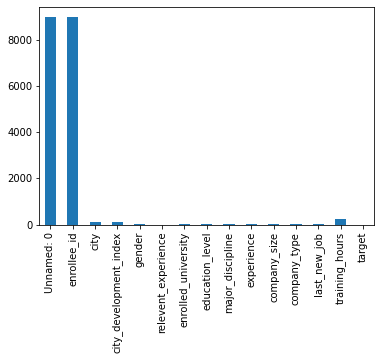

In [73]:
print(df.nunique())
df.nunique().plot.bar()

# It is counting the unnamed index column and the enrollee_id column as target labels, making the plot much more difficult to read. This wide variation will likely draw attention away from actual important features like education level, experience, etc.

# 2. Feature Selection and Pre-processing (25 pts total)

## 2.1 Preprocessing City (1+1+1+1 = 4pts total)

### 2.1.1 Plot no. of records per city so that the highest city counts are shown in descending order (1pt)

city_103    2426
city_21     1111
city_16      836
city_114     648
city_160     401
            ... 
city_127       1
city_107       1
city_62        1
city_109       1
city_25        1
Name: city, Length: 116, dtype: int64


<AxesSubplot:>

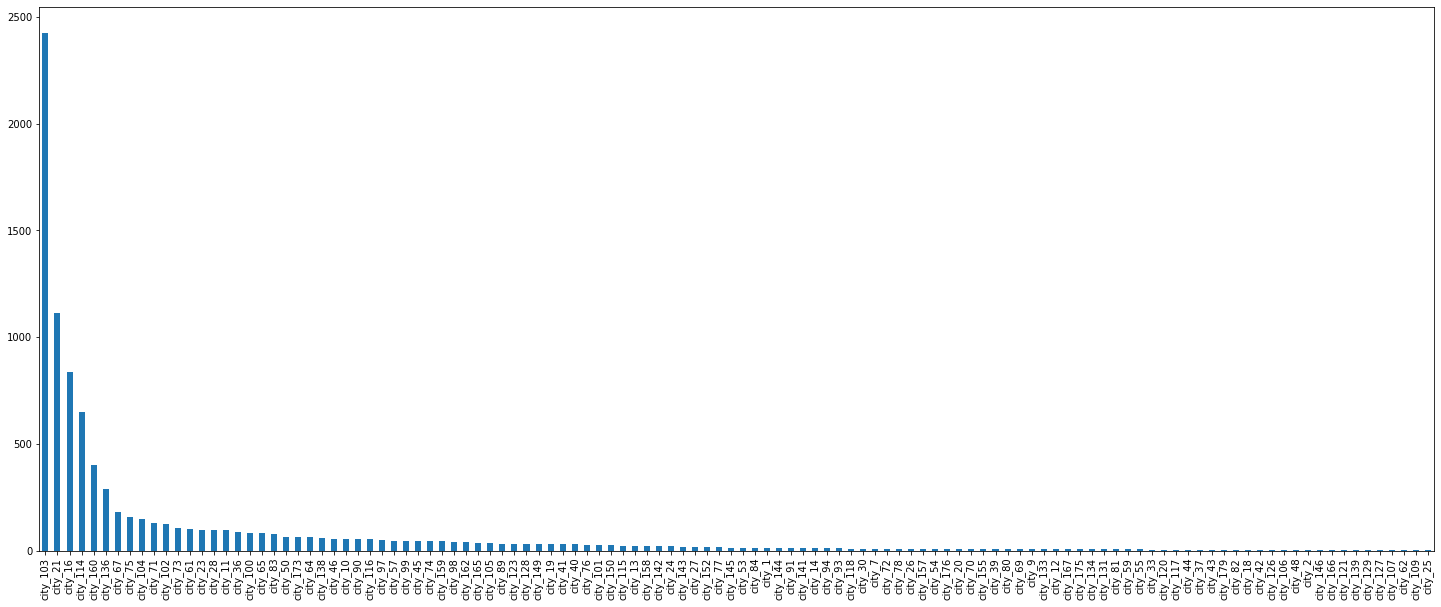

In [74]:
print(df['city'].value_counts())
(df['city'].value_counts()).plot.bar(figsize=(25,10))

### 2.1.2 How many rows belong to the count-wise top 4 cities in total and how many for the remaining? (1pt)

In [75]:
# Cities 103, 21, 16, and 114 are the top 4.
top4count = df['city'].value_counts()["city_103"] + df['city'].value_counts()["city_21"] + df['city'].value_counts()["city_16"] + df['city'].value_counts()["city_114"]
print("Entries in the top 4 cities: " + str(top4count))
print("Entries NOT in the top 4 cities: " + str(8955 - top4count))

Entries in the top 4 cities: 5021
Entries NOT in the top 4 cities: 3934


### 2.1.3 Replace the city name with city_others if the city name is not among the top 4 (1pt)

In [76]:
top4 = ["city_103", "city_21", "city_16", "city_114"]
df.loc[~df["city"].isin(top4), "city"] = "city_others"



### 2.1.4 Show some sample data that the records have changed correctly. (1pt)

In [77]:
print(df.iloc[0:10])

   Unnamed: 0  enrollee_id         city  city_development_index gender  \
0           1        29725  city_others                   0.776   Male   
1           4          666  city_others                   0.767   Male   
2           7          402  city_others                   0.762   Male   
3           8        27107     city_103                   0.920   Male   
4          11        23853     city_103                   0.920   Male   
5          12        25619  city_others                   0.913   Male   
6          15         6588     city_114                   0.926   Male   
7          20        31972  city_others                   0.843   Male   
8          21        19061     city_114                   0.926   Male   
9          23         7041  city_others                   0.776   Male   

       relevent_experience enrolled_university education_level  \
0   No relevent experience       no_enrollment        Graduate   
1  Has relevent experience       no_enrollment       

## 2.2. Preprocessing Education Level (1+2+2+1 = 6pts total)

### 2.2.1. Show the unique values of education level. (1pt)

Graduate    6252
Masters     2449
Phd          254
Name: education_level, dtype: int64


<AxesSubplot:>

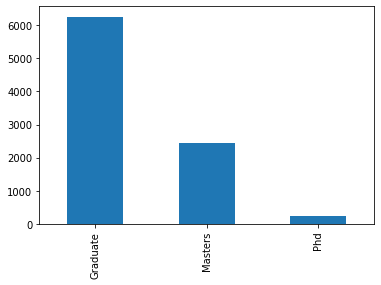

In [78]:
print(df['education_level'].value_counts())
(df['education_level'].value_counts()).plot.bar()

### 2.2.2. Write a function named replace_labels() that can replace labels using given {old_label:new_label} dictionary (2pts)

Parameters: (1) dataframe, (2) a column name, (3) a dictionary with {old_label:new_label} mapping. 

Returns: a dataframe with specified column values replaced with the  


In [79]:
def replace_labels(data, column_name, values):
  df2 = df.replace({column_name: values})
  return df2

### 2.2.3. Using the replace_labels() function you just created, replace education_level column with ordinal values. The mapping can be like "Graduate":0, "Masters":1, "Phd":2 . (2pt)

In [80]:
newedu = {"Graduate":0, "Masters":1, "Phd":2}
df = replace_labels(df, "education_level", newedu)

### 2.2.4 Show some sample data that the records have changed appropriately (1pt)

In [81]:
print(df.iloc[15:20])

    Unnamed: 0  enrollee_id      city  city_development_index  gender  \
15          35         4866  city_103                   0.920    Male   
16          37        10164  city_114                   0.926    Male   
17          40         2547  city_114                   0.926  Female   
18          44         5590   city_21                   0.624    Male   
19          46         9006   city_21                   0.624    Male   

        relevent_experience enrolled_university  education_level  \
15  Has relevent experience       no_enrollment                0   
16  Has relevent experience       no_enrollment                2   
17  Has relevent experience    Full time course                1   
18  Has relevent experience    Part time course                1   
19  Has relevent experience       no_enrollment                0   

   major_discipline  experience company_size         company_type  \
15             STEM        10.0        10/49  Early Stage Startup   
16            

## 2.3. Preprocessing company_size (2+2+1 = 5pts total)

### 2.3.1 Show the unique values of the company_size column and their counts (2pt)

In [82]:
print(df['company_size'].value_counts())
# Unique values on left, counts on right

50-99        1986
100-500      1814
10000+       1449
10/49         951
1000-4999     930
<10           840
500-999       592
5000-9999     393
Name: company_size, dtype: int64


### 2.3.2 Change the values of the company_size column from 0 to 7 where e0 is <10 and 7 is 10000+. The order of the numbers should be based on the values of the column-like an ordinary variable. (2pt)
(Hint: you can use the replace_labels() function you created before.)

In [83]:
newsize = {"<10":0, "10/49":1, "50-99":2, "100-500":3, "500-999":4, "1000-4999":5, "5000-9999":6, "10000+":7}
df = replace_labels(df, "company_size", newsize)

### 2.3.3 Show the updated unique values to validate they changed appropriately (1pt)

In [84]:
print(df['company_size'].value_counts())
# Unique values on left, counts on right

2    1986
3    1814
7    1449
1     951
5     930
0     840
4     592
6     393
Name: company_size, dtype: int64


## 2.4. Preprocessing last_new_job (1+2+1 = 4pts total)

### 2.4.1 Show unique values of the last_new_job column (1pt)

In [85]:
print(df['last_new_job'].value_counts())
# Unique values on left, counts on right

1        3838
>4       1965
2        1570
3         610
4         599
never     373
Name: last_new_job, dtype: int64


### 2.4.2 Convert the values of this column to never->0, 1->1,....>4 -->5 (2pt)
Hint: replace_labels()

In [86]:
newlj = {"never":0, "1":1, "2":2, "3":3, "4":4, ">4":5}
df = replace_labels(df, "last_new_job", newlj)

### 2.4.3 Show the updated values (1pt)

In [87]:
print(df['last_new_job'].value_counts())
# Unique values on left, counts on right

1    3838
5    1965
2    1570
3     610
4     599
0     373
Name: last_new_job, dtype: int64


## 2.5 Preprocessing other columns (2pt total)

### 2.5.1 Drop the enrollee_id, any unnamed columns, and any duplicate columns (if you created multiple columns one with original and one with updated, then remove the original one) (2pt)

In [88]:
del df['Unnamed: 0']
del df['enrollee_id']
print(df.iloc[0:10])

          city  city_development_index gender      relevent_experience  \
0  city_others                   0.776   Male   No relevent experience   
1  city_others                   0.767   Male  Has relevent experience   
2  city_others                   0.762   Male  Has relevent experience   
3     city_103                   0.920   Male  Has relevent experience   
4     city_103                   0.920   Male  Has relevent experience   
5  city_others                   0.913   Male  Has relevent experience   
6     city_114                   0.926   Male  Has relevent experience   
7  city_others                   0.843   Male  Has relevent experience   
8     city_114                   0.926   Male  Has relevent experience   
9  city_others                   0.776   Male  Has relevent experience   

  enrolled_university  education_level major_discipline  experience  \
0       no_enrollment                0             STEM        15.0   
1       no_enrollment                1     

## 2.6 Feature Scaling (3+1 = 4ps total)

### 2.6.1 Use sklearn.preprocessing's MinMaxScaler to perform min max scaling to all the numeric columns (3pt)

In [89]:
import sklearn.preprocessing as preprocessing

columns = ['city_development_index', 'education_level', 'experience', 'company_size', 'last_new_job', 'training_hours', 'target']

min_max = preprocessing.MinMaxScaler()
df[columns] = min_max.fit_transform(df[columns])

### 2.6.2 Show some of the scaled records. (1pt)

In [90]:
print(df.iloc[0:10])

          city  city_development_index gender      relevent_experience  \
0  city_others                0.654691   Male   No relevent experience   
1  city_others                0.636727   Male  Has relevent experience   
2  city_others                0.626747   Male  Has relevent experience   
3     city_103                0.942116   Male  Has relevent experience   
4     city_103                0.942116   Male  Has relevent experience   
5  city_others                0.928144   Male  Has relevent experience   
6     city_114                0.954092   Male  Has relevent experience   
7  city_others                0.788423   Male  Has relevent experience   
8     city_114                0.954092   Male  Has relevent experience   
9  city_others                0.654691   Male  Has relevent experience   

  enrolled_university  education_level major_discipline  experience  \
0       no_enrollment              0.0             STEM    0.714286   
1       no_enrollment              0.5     

# 3. X/Y and Training/Test Split with stratified sampling (15pts in total)

### 3.1 Using a lot of features with categorical values is not memory-efficient. Use a LabelEncoder() to convert all the categorical columns to numeric labels. (This task is similar to previous assignment A1) (2pt)

In [91]:
label_encoder = preprocessing.LabelEncoder()

df['city']= label_encoder.fit_transform(df['city'])
df['gender']= label_encoder.fit_transform(df['gender'])
df['relevent_experience']= label_encoder.fit_transform(df['relevent_experience'])
df['enrolled_university']= label_encoder.fit_transform(df['enrolled_university'])
df['major_discipline']= label_encoder.fit_transform(df['major_discipline'])
df['company_type']= label_encoder.fit_transform(df['company_type'])

print(df.iloc[0:10])

   city  city_development_index  gender  relevent_experience  \
0     4                0.654691       1                    1   
1     4                0.636727       1                    0   
2     4                0.626747       1                    0   
3     0                0.942116       1                    0   
4     0                0.942116       1                    0   
5     4                0.928144       1                    0   
6     1                0.954092       1                    0   
7     4                0.788423       1                    0   
8     1                0.954092       1                    0   
9     4                0.654691       1                    0   

   enrolled_university  education_level  major_discipline  experience  \
0                    2              0.0                 5    0.714286   
1                    2              0.5                 5    1.000000   
2                    2              0.0                 5    0.619048   
3  

### 3.2 Copy all the features into X and the target to Y (2pt)

In [92]:
X = df[['city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours']].copy()
Y = df["target"]


### 3.3 Show the ratio of 1 and 0 in Y. (1pt)

In [93]:
count1 = Y.value_counts()[1]
countY = (Y.value_counts()[0] + Y.value_counts()[1])
ratio1 = count1/countY

print(str(count1) + " 1's")
print(str(countY) + " total rows")
print("\nRatio of 1's in Y: " + str(ratio1))

1483 1's
8955 total rows

Ratio of 1's in Y: 0.16560580681183695


### 3.4 Use sklearn's train_test_split() to split the data set into 70% training and 30% test sets. Set random_state to 42. We want to have the same ratio of 0 and 1 in the test set, use the stratify parameter to Y to ensure this. Then show the ratio of 1 and 0 in both train and test target. (4pt)

In [94]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

count1test = y_test.value_counts()[1]
countYtest = (y_test.value_counts()[0] + y_test.value_counts()[1])
ratio1test = count1test/countYtest
print("Ratio of 1's in y_test: " + str(ratio1test))

count1train = y_train.value_counts()[1]
countYtrain = (y_train.value_counts()[0] + y_train.value_counts()[1])
ratio1train = count1train/countYtrain
print("Ratio of 1's in y_train: " + str(ratio1train))

Ratio of 1's in y_test: 0.1656122069222181
Ratio of 1's in y_train: 0.1656030631780472


### 3.5 Rebalancing (4+2 = 6pts)

3.5.1 Use imblearn's SMOTENC to balance the x_train


When our training set have class imbalance, we often perform over-sampling to generate synthetic data that can help in training. SMOTE is a library by imblearn for this purpose. The usage is fairly straightforward. See documentation [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC) and a brief explanation with example [here](https://medium.com/analytics-vidhya/smote-nc-in-ml-categorization-models-fo-imbalanced-datasets-8adbdcf08c25)

In [95]:
from imblearn.over_sampling import SMOTENC

sm = SMOTENC(categorical_features=[0, 2, 3, 4, 5, 6, 9, 10], random_state=42)
x_trainres, y_trainres = sm.fit_resample(x_train, y_train)

3.5.2 Did that change the ratio in label? Confirm by printing the ratio in resampled labels.

In [96]:
count1trainres = y_trainres.value_counts()[1]
countYtrainres = (y_trainres.value_counts()[0] + y_trainres.value_counts()[1])
ratio1trainres = count1trainres/countYtrainres
print("Ratio of 1's in y_train: " + str(ratio1trainres))

Ratio of 1's in y_train: 0.5


# 4. Decision Tree (20pts total)

### 4.1 Initialize a decision tree model using sklearns DecisionTreeClassifier. Use the unbalanced training set. Set a consistent value for random_state parameter so that your result is reproducible. (1pt)

In [97]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

### 4.2 Use grid search to find out the best combination of values for the parameters: criterion, max_depth, min_samples_split, max_features. Then print the best performing parameters. (4pt)

In [98]:
from sklearn.model_selection import GridSearchCV
params = {
    'criterion': ["gini", "entropy"], #it is getting mad at me when I try using log_loss.
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
}
gs = GridSearchCV(estimator = clf, param_grid = params, scoring='accuracy')
gs.fit(x_train, y_train)
print(gs.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'max_features': 6, 'min_samples_split': 2}


### 4.3 Add the best performing parameter set to the already-initialized Decision Tree model. Then fit it on the train dataset. (2pt)

In [99]:
clf = DecisionTreeClassifier(random_state = 42, criterion='gini', max_depth=2, max_features=8, min_samples_split=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, max_features=8, random_state=42)

### 4.4 Import the accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score from scikitlearn's metrics package. Evaluate your Decision Tree on the Test dataset and print all the metrics. (3pt)

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
y_test_pred = clf.predict(x_test)

print("The accuracy score for clf is ", accuracy_score(y_test, y_test_pred))
print("The precision score for clf is ", precision_score(y_test, y_test_pred))
print("The recall score for clf is ", recall_score(y_test, y_test_pred))
print("The confusion matrix for clf is ", confusion_matrix(y_test, y_test_pred))
print("The f1 score for clf is ", f1_score(y_test, y_test_pred))
print("The roc auc score for clf is ", roc_auc_score(y_test, y_test_pred))

The accuracy score for clf is  0.8585783401563082
The precision score for clf is  0.5818639798488665
The recall score for clf is  0.5191011235955056
The confusion matrix for clf is  [[2076  166]
 [ 214  231]]
The f1 score for clf is  0.5486935866983373
The roc auc score for clf is  0.72253004440257


### 4.5 Plot the tree using scikitlearn's tree package. You may need to define a large figure size using matplotlib to have an intelligible figure. (2pt)

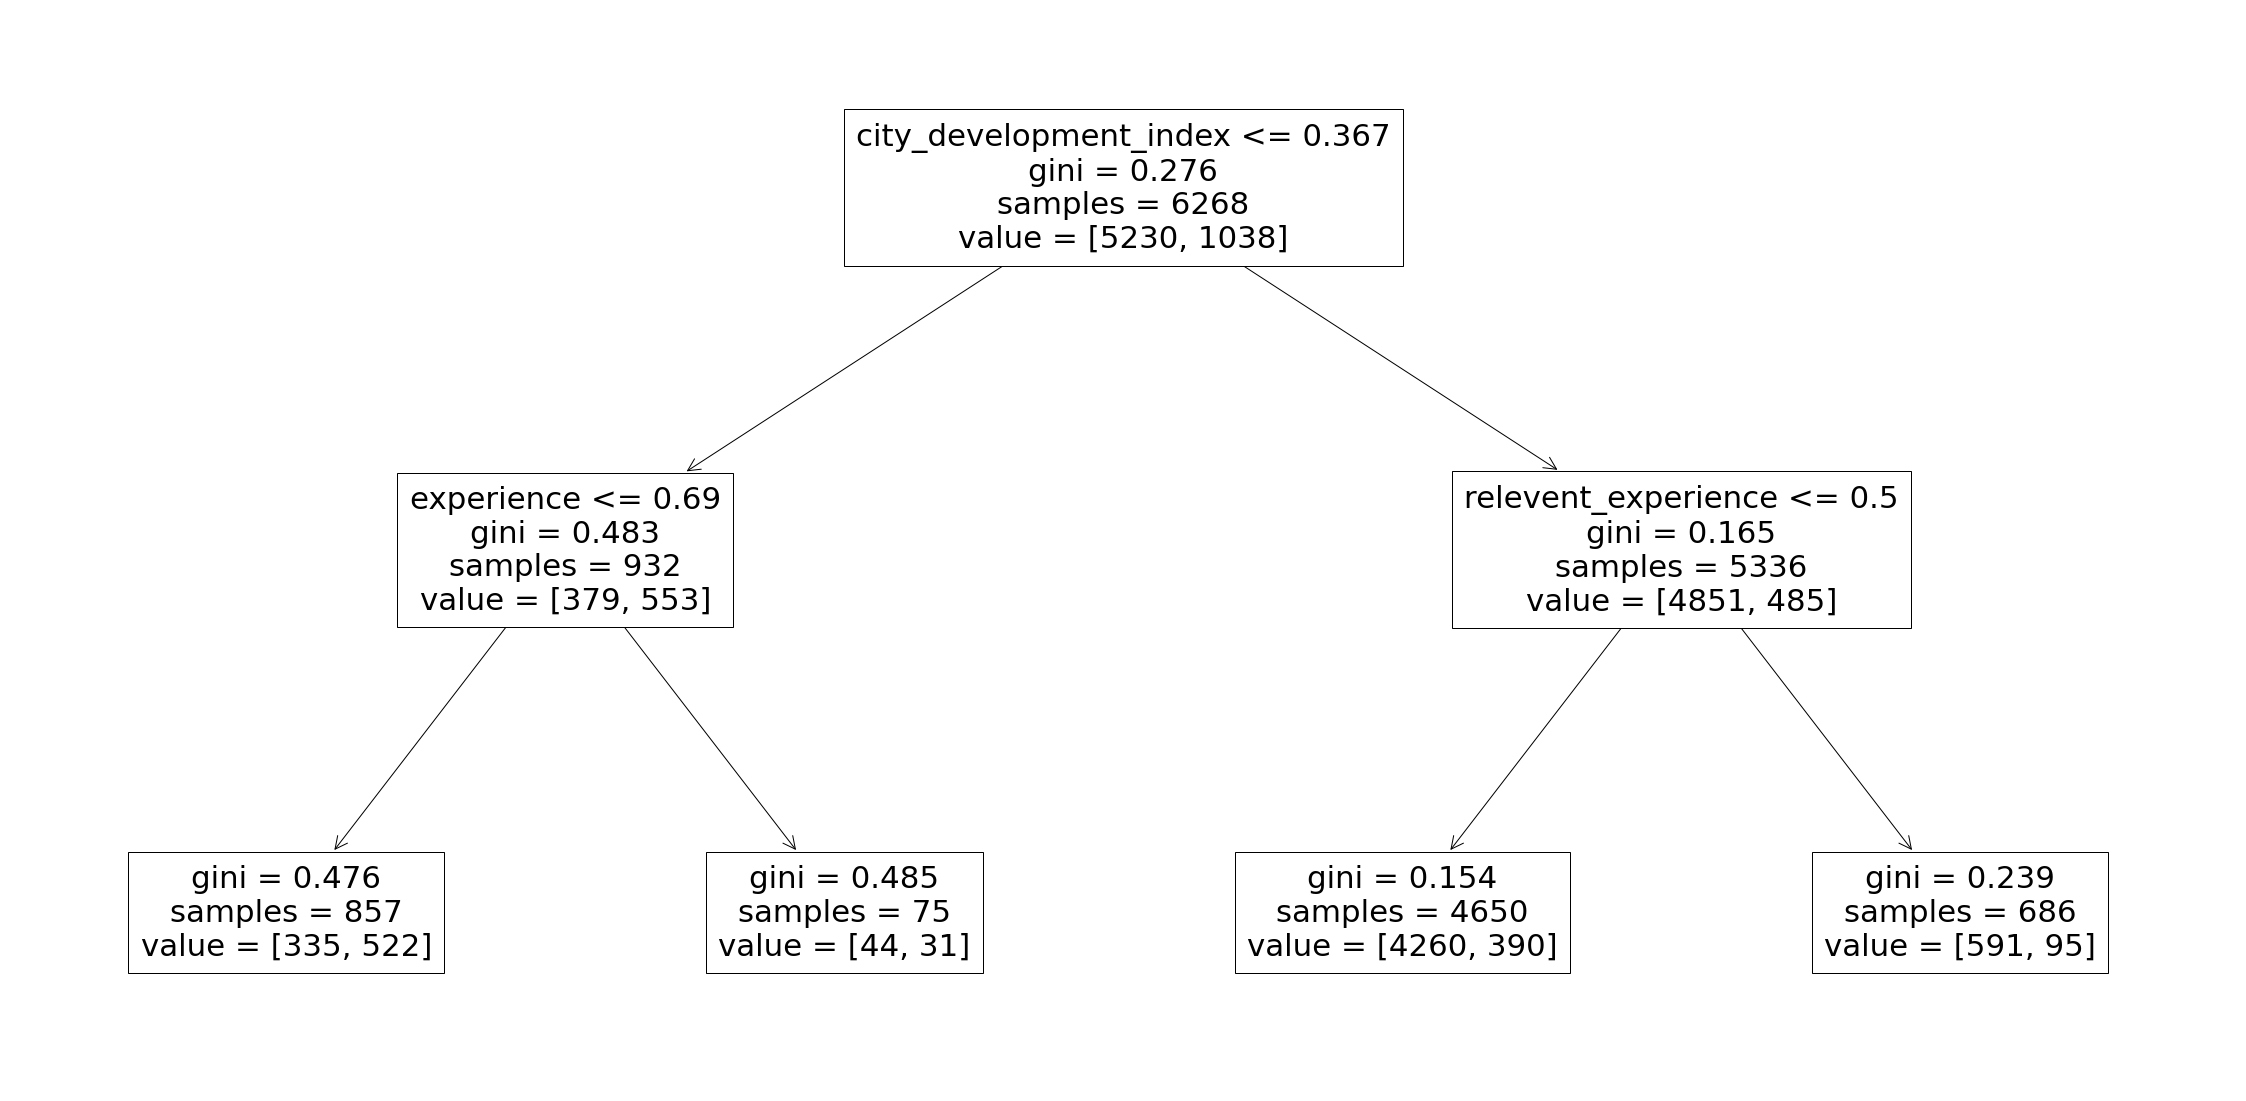

In [101]:
from sklearn import tree
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(clf, feature_names = X.columns)
plt.show()

### 4.6 Initialize a new Decision Tree model, then use the best set of parameters from Step 4.3 to train it on the balanced train set that you prepared in Step 3.5.1. (3pt)

In [102]:
newtree = DecisionTreeClassifier(random_state = 42, criterion='gini', max_depth=2, max_features=8, min_samples_split=2)
newtree.fit(x_trainres, y_trainres)

DecisionTreeClassifier(max_depth=2, max_features=8, random_state=42)

### 4.7 Print the evaluation scores (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) from the training on balanced dataset. (3pt)

In [103]:
y_test_pred = newtree.predict(x_test)

print("The accuracy score for newtree is ", accuracy_score(y_test, y_test_pred))
print("The precision score for newtree is ", precision_score(y_test, y_test_pred))
print("The recall score for newtree is ", recall_score(y_test, y_test_pred))
print("The confusion matrix for newtree is ", confusion_matrix(y_test, y_test_pred))
print("The f1 score for newtree is ", f1_score(y_test, y_test_pred))
print("The roc auc score for newtree is ", roc_auc_score(y_test, y_test_pred))

The accuracy score for newtree is  0.8567175288425753
The precision score for newtree is  0.5697674418604651
The recall score for newtree is  0.550561797752809
The confusion matrix for newtree is  [[2057  185]
 [ 200  245]]
The f1 score for newtree is  0.56
The roc auc score for newtree is  0.7340230933456284


### 4.8 Discuss any difference between evaluation results from the unbalanced train set and balanced train set. (2pt)

The results from using the balanced train set had slightly lower accuracy and precision, but higher recall and f1 score. The balanced set also yielded a higher roc auc score. I actually find it pretty interesting that accuracy went *down* with the balanced set. I guess SMOTENC didn't do a completely perfect job creating new synthetic data.

# 5. Random Forest Classifier (12pts total)

### 5.1 Use grid search to find best combinations of the following Random Forest parameters: n_estimators, max_depth, min_samples_split and min_samples_leaf. Use your own choice of scoring, criterion, number of folds for cross-validation for the model initialization. Remember the grid search can take a while to finish. (4pt)

In [104]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42, criterion="gini")
params = {
    'n_estimators': [2, 3, 4, 5, 6],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [2, 3, 4, 5, 6],
}
gs = GridSearchCV(estimator = forest, param_grid = params)
gs.fit(x_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [2, 3, 4, 5, 6]})

### 5.2 Print the best combination of parameters and use it to train a Random Forest classifier model. (3pt)

In [105]:
print(gs.best_params_)
forest = RandomForestClassifier(random_state = 42, criterion='gini', max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=6)
forest.fit(x_train, y_train)

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 6}


RandomForestClassifier(max_depth=4, min_samples_leaf=4, n_estimators=6,
                       random_state=42)

### 5.3  Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (5pt)

In [106]:
y_test_pred = forest.predict(x_test)

print("The accuracy score for the forest is ", accuracy_score(y_test, y_test_pred))
print("The precision score for the forest is ", precision_score(y_test, y_test_pred))
print("The recall score for the forest is ", recall_score(y_test, y_test_pred))
print("The confusion matrix for the forest is ", confusion_matrix(y_test, y_test_pred))
print("The f1 score for the forest is ", f1_score(y_test, y_test_pred))
print("The roc auc score for the forest is ", roc_auc_score(y_test, y_test_pred))

The accuracy score for the forest is  0.8526237439523632
The precision score for the forest is  0.5758513931888545
The recall score for the forest is  0.41797752808988764
The confusion matrix for the forest is  [[2105  137]
 [ 259  186]]
The f1 score for the forest is  0.484375
The roc auc score for the forest is  0.6784356864356663


# 6. Boosting Classifier (20 pts total)

## 6.1 AdaBoost Classifier (10 pts total)

### 6.1.1 Perform a grid search for best values for parameters={n_estimators, learning_rate} of an AdaBoostClassifier and the given training set. (4pt) 

In [107]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)
params = {
    'n_estimators': [30, 40, 50, 60, 70],
    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1]
}
gs = GridSearchCV(estimator = ada, param_grid = params)
gs.fit(x_train, y_train)
print(gs.best_params_)

{'learning_rate': 0.1, 'n_estimators': 50}


### 6.1.2 Train an AdaboostClassifier using the best parameter set you found in step 6.1.1 (3pt) 

In [108]:
ada = AdaBoostClassifier(random_state=42, n_estimators = 50, learning_rate = 0.1)
ada.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.1, random_state=42)

### 6.1.3 Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (3pt)

In [109]:
y_test_pred = ada.predict(x_test)

print("The accuracy score for ada is ", accuracy_score(y_test, y_test_pred))
print("The precision score for ada is ", precision_score(y_test, y_test_pred))
print("The recall score for ada is ", recall_score(y_test, y_test_pred))
print("The confusion matrix for ada is ", confusion_matrix(y_test, y_test_pred))
print("The f1 score for ada is ", f1_score(y_test, y_test_pred))
print("The roc auc score for ada is ", roc_auc_score(y_test, y_test_pred))

The accuracy score for ada is  0.8582061778935616
The precision score for ada is  0.5754716981132075
The recall score for ada is  0.5483146067415731
The confusion matrix for ada is  [[2062  180]
 [ 201  244]]
The f1 score for ada is  0.5615650172612199
The roc auc score for ada is  0.7340145736651665


## 6.2 Gradient Boosting Classifier (10 pts total)

### 6.2.1 Perform a grid search for best values for parameters={n_estimators, max_depth, learning_rate} of a GradientBoostingClassifier and the given training set. (4pt)

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
params = {
    'max_depth': [2, 3, 4, 5],
    'n_estimators': [30, 40, 50, 60, 70],
    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1]
}
gs = GridSearchCV(estimator = gbc, param_grid = params)
gs.fit(x_train, y_train)
print(gs.best_params_)

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 70}


### 6.2.2 Train a GradientBoostingClassifier using the best parameter set you found in step 6.2.1 (3pt) 

In [111]:
gbc = GradientBoostingClassifier(random_state=42, n_estimators = 70, learning_rate = 0.05, max_depth=2)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, n_estimators=70,
                           random_state=42)

### 6.2.3 Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (3pt)

In [112]:
y_test_pred = gbc.predict(x_test)

print("The accuracy score for gbc is ", accuracy_score(y_test, y_test_pred))
print("The precision score for gbc is ", precision_score(y_test, y_test_pred))
print("The recall score for gbc is ", recall_score(y_test, y_test_pred))
print("The confusion matrix for gbc is ", confusion_matrix(y_test, y_test_pred))
print("The f1 score for gbc is ", f1_score(y_test, y_test_pred))
print("The roc auc score for gbc is ", roc_auc_score(y_test, y_test_pred))

The accuracy score for gbc is  0.8589505024190547
The precision score for gbc is  0.583756345177665
The recall score for gbc is  0.5168539325842697
The confusion matrix for gbc is  [[2078  164]
 [ 215  230]]
The f1 score for gbc is  0.5482717520858165
The roc auc score for gbc is  0.7218524792270143


# 7. Summary Discussion (4 pts)

Which model yields the highest precision? GradientBoostingClassifier had the highest precision at ~0.584.

Which model yields the lowest recall? RandomForestClassifier had the lowest recall at ~0.418.

Which model yields the higest True Positive (TP)? DecisionTreeClassifier *with the balanced SMOTENC data* had the highest true positive rate (the highest recall) at ~0.551.

Which model yields the best performance overall? GradientBoostingClassifier had both the highest accuracy at ~0.859 and the highest precision at ~0.584.